# Bayesian A/B Testing

So now we are going to spend today reviewing concecpts regarding AB testing using a bayesian approach. 


**Success Criteria**

I will feel successful today if I can... 

- Compare and Contrast Frequentist vs Bayesian Mindsets regarding A/B testing
- Give at least one reason why we use the Beta Distribution in baysian A/B testing
- Explain what a conjugate prior is


**Agenda**
1. Review Frequentist Hypothesis Testing
3. Introduce Beta Distribution
4. How to use Beta Distribution
5. Actually do the original A/B test
6. Answer the question... What's the probability that site B is better than site A?
7. Answer Why do we call this Bayesian A/B Testing?

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Review of Frequentist Hypothesis Testing and P-values

#### Steps for frequentist hypothesis testing:

1. Define your null hypothesis.
2. Define the alpha (significance) cutoff.
3. Determine how many samples you'll need for a given effect size and significance level (the power).
3. Collect data.
4. Compute the appropriate statistic (e.g. the t-statistic).
5. Compute the probability of that statistic (or something more rare) under the null hypothesis. (aka, the p-value)
6. "Reject" or "fail to reject" the null hypothesis.

#### Concept of P-value

"*The probability of observing data at least as extreme as the observation given the null hypothesis*"

#### Example

Say our company is rolling out an A/B test to determine if the new "Click to Shop" Button is improving our clickthrough rates? 

You go through all the steps a frequentist would and find a p_value lower than your original alpha value. You head to the stakeholders meeting and say... 

    "Assuming that our new button is not better than our original, I feel confident that would not see this data (or something more rare) if I sampled from this site over-and-over-and-over... forever. so we can claim that we have a higher CTR using our new button. - nothing is ever certain but we are happily confident that our Null Hypothesis can be rejected."  

Not only is it a mouthful but wouldn't it be nice to come to your stakeholders with a phrase you can get behind like ... 

    "It is 98% likely that site B has a higher CTR than site A"
    

### A dream of frequentist hypothesis testing

Wouldn’t it be nice if, instead, we could give a **probability** of probability, rather than *yes* or *no*, of a ***hypothesis*** given the ***data***?

This is where bayesian statistics comes in.

## Let's do Bayesian A/B Testing

So, we know how to run hypothesis tests (from the **frequentist** world), and we can do **A/B testing via hypothesis testing**, of course.

But now let's do **A/B testing under a Bayesian framework**.


Quick question... 

What do we use to model uncertainty about female heights? 

In [2]:
# Maximum Likelihood Estimation (based on Law of Small Numbers)

What do we use to model the uncertainty of a probability? 

Which distribution do we know that will allow us to say:

    "It is 98% likely that site B has a higher CTR than site A"

### The Beta Distribution: $\text{Beta}(\alpha, \beta)$

The Beta Distribution is a **probability distribution on probabilities**. In other words, it is used to model probabilities.

<!-- 
 First, define p as the probability of landing a head. If the coin is fair, then it is most likely that the coin will land head half of the time. In this case, p = 50% is the most likely value for p. But wait, it is also possible to have an unfair coin that behaves accidentally like a fair coin. So we cannot rule out the possibility that the coin is unfair, even if we observe heads half of the time.
 -->
##### For example:

Consider determining if you have a fair or unfair coin. The Beta Distribution describes how likely p can take on each value between 0 and 1.


##### Parameters

The beta distribution has two hyper-parameters (also known as "shape parameters"):
- $\alpha > 0$: we will use this to encode the number of "successes" of a website (more on that later)
- $\beta > 0$: we will use this to encode the number of "failures" of a website (more on that later)

You can choose the $\alpha$ and $\beta$ parameters however you think they are supposed to be. For example, if you think the probability of success is very high, let’s say 90%, set 90 for $\alpha$ and 10 for $\beta$. Again more on this later...


0.4628311659999997

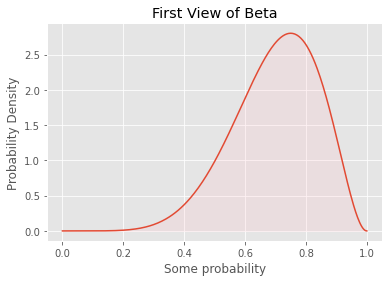

In [3]:
# Imagine we get 7 heads and 3 tails... 
alpha = 7
beta = 3

dist = stats.beta(alpha, beta)
x = np.linspace(0.0, 1.0, 301)

# The probability density at each sample support value.
y = dist.pdf(x)

fig, ax = plt.subplots()
lines = ax.plot(x, y)
ax.fill_between(x, y, alpha=0.2, color='pink')
    
ax.set_title('First View of Beta')
# ax.get_yaxis().set_ticks([])
ax.set_xlabel('Some probability')
ax.set_ylabel('Probability Density');
dist.cdf(0.7)


**NOTE: knowing the pdf and ${B(\alpha, \beta)}$ piece is not in your success criteria, but if you are interested here is some information about the Distribution.**

Support: $x \in [0, 1]$

PDF: $f(x) = \dfrac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}$

where $B(\alpha, \beta) = \dfrac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$

where $\Gamma(x)$ is an extension of the factorial function which works for a wider range of input (like any positive real value)

**Get a feel for the Beta Distribution:**

Let's plot a few Beta Distributions (with varying shape parameters).

## Note:

### A key property of the $\beta$ distribution is that it is constrained to the range of 0 to 1. This is different than some other distributions that extend from $-\infty$ to $+\infty$ or $0$ to $+\infty$.

### This constraint makes it useful for modeling the $p$ parameter of a bernoulli or binomial distribution, which we know can only take values between 0 and 1.

### As we will see in a minute, this correspondence between $\beta$ and $p$ is more than just superficial. 

In [4]:
#Similar to our original plot done above
def plot_beta(alpha, beta, ax, title=None, label=None, xticks=[0.0, 0.5, 1.0]):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 301)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)


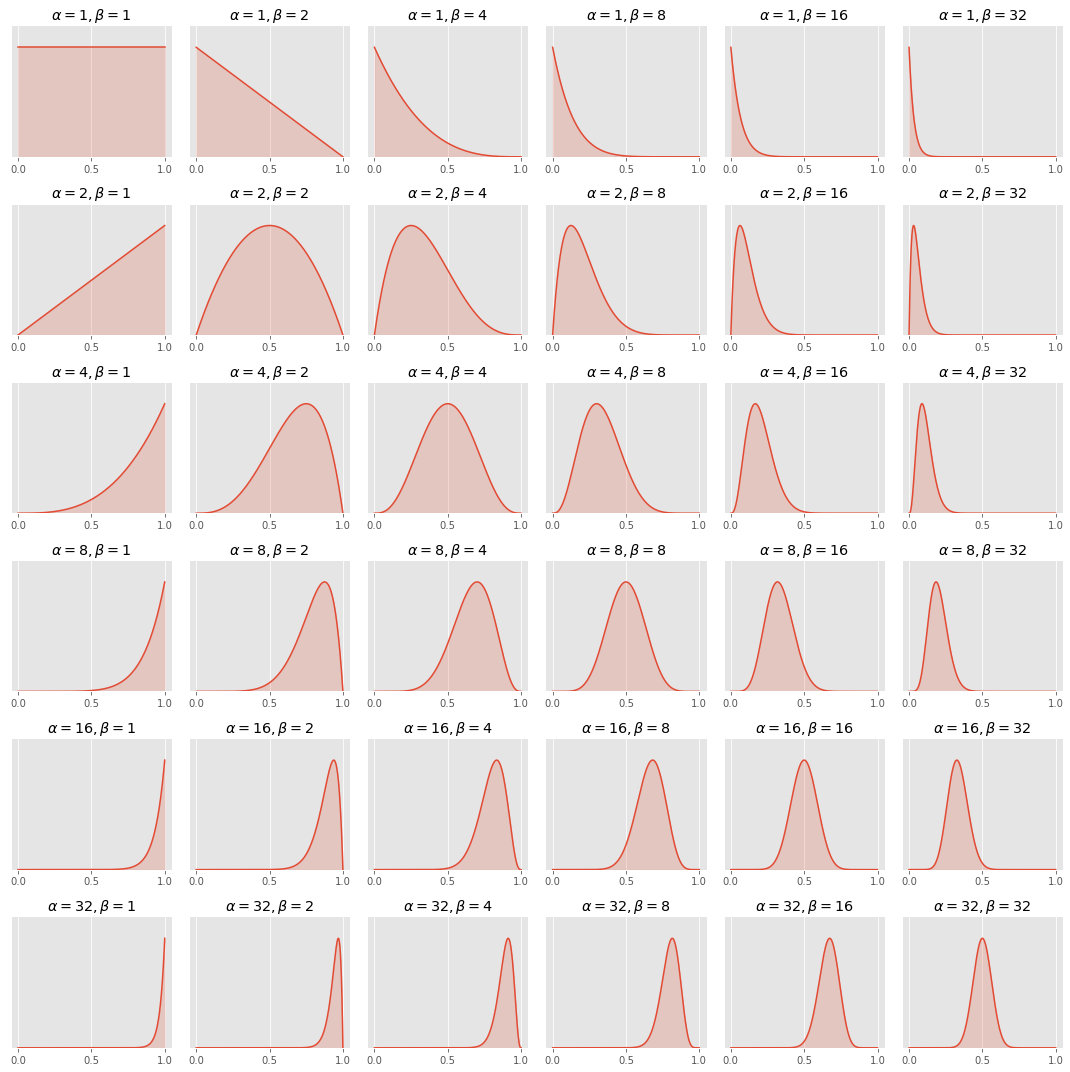

In [12]:
# The shape parameters. 
alpha_values = [1, 2, 4, 8, 16, 32]  
beta_values  = [1, 2, 4, 8, 16, 32]
n_rows, n_cols = len(alpha_values), len(beta_values)
alpha_beta_pairs = ( (i, j) for i in alpha_values for j in beta_values )

# Create a large figure - nice way to do it.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Plot each beta dist. One plot per pair of shape params.
for (alpha, beta), ax in zip(alpha_beta_pairs, axes.flatten()):
    plot_beta(alpha, beta, ax, r"$\alpha={0} ,  \beta={1}$".format(alpha, beta))

plt.tight_layout()


**What patterns do you see in the above distributions?**

Here are a few:
* If $\alpha$ is larger than $\beta$, the distribution is shifted to the **right** and skewed to the left.
* If $\alpha$ is smaller than $\beta$, the distribution shifted to the **left** and skewed to the right.
* If $\alpha = \beta$, the distribution is **symmetric** and **centered** at $0.5$.
* The distribution gets **skinnier** as $\alpha$ and $\beta$ increase.

Linking $\alpha$ and $\beta$ to the moments:

The **mean** of the Beta Distribution is: $E(X) = \dfrac{\alpha}{\alpha + \beta}$

The **variance** of the Beta Distribution is: $\text{Var}(X) = \dfrac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

### How we can use the Beta Distribution (A BIG IDEA)

What if we set:
- $\alpha = 1 + \text{number of conversions on our website}$
- $\beta = 1 + \text{number of misses on our website}$
- $\alpha + \beta = 2 + \text{total number of visits to website}$

Then, as we know, the **mean of the beta distribution** would be $\dfrac{\alpha}{\alpha + \beta}$ which equals smoothed **conversion rate**!

If we think of $\alpha$ as "Wins" or "Heads" and $\beta$ as "Losses" or "Tails", then 

$$\alpha + \beta = flips$$

and 

$$\frac{\alpha}{\alpha + \beta}=\frac{Heads}{Flips}$$

is the probability of heads, which is the $p$ of a bernoulli or binomial distribution.

Also, the more visitors we have (i.e. the larger $(\alpha + \beta)$), then the **smaller the variance of our beta distribution will be**.

Put all this together, **_the beta distribution models the probability of the conversion rate_** of our website (which we are trying to figure out from our data). The beta distribution is one way to model our **belief** of what the conversion rate might be.

A continuous probability distribution (like the beta distribution) puts relative likelihoods to each of the values in the support. In our case, the support is theorized conversion rates. On the y-axis of the PDF we have probability density, and on the x-axis of the PDF we have probabilities (conversion rates). So we have probabilities of probabilities (relative probability of conversion rates.)

**Why we like it:** The reason we like it is that this lets us know the **strength of our belief** about the conversion rate of our website. 



QUESTION: Are all of these conversion rates the same? 

$$ \frac{2}{10} =\frac{20}{100}=\frac{200}{1000} $$



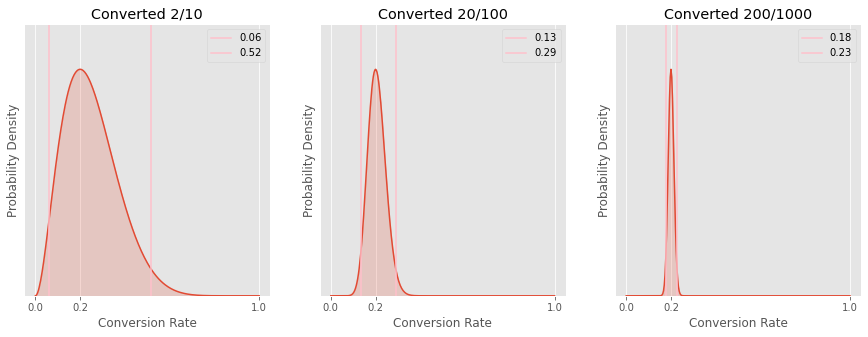

In [25]:
def get_beta_dist_params(website_samples):
    #array of website conversions... zeros and ones (convert or didnt convert)
    website_samples = np.array(website_samples)
    
    #total number of conversions
    num_conversions = website_samples.sum()
    #total number of datapoints
    total_visitors = len(website_samples)
    
    #plus one to set a and beta as uniform priors...try other numbers to see the changes
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    
    #mean number of conversions... aka conversion rate
    mean = 1 * num_conversions / total_visitors
    
    # Alpha = number of successes +1
    # Beta = Number of failures +1
    # Mean = conversion rate
    # num_conversions & total_visitors(used to make labels on graphs)
    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_website(website_samples, ax, label=None):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Conversion Rate")
    ax.set_ylabel("Probability Density")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in zip([2,20,200] , axs.flatten()):
    plot_beta_website([0, 1, 0, 0, 0]*i, ax)
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params([0, 1, 0, 0, 0]*i)
    ax.axvline(stats.beta(alpha, beta).ppf(0.025), color='pink', label= f'{stats.beta(alpha, beta).ppf(0.025):.2f}')
    ax.axvline(stats.beta(alpha, beta).ppf(0.975), color='pink', label= f'{stats.beta(alpha, beta).ppf(0.975):.2f}')
    ax.legend()
        

    
    

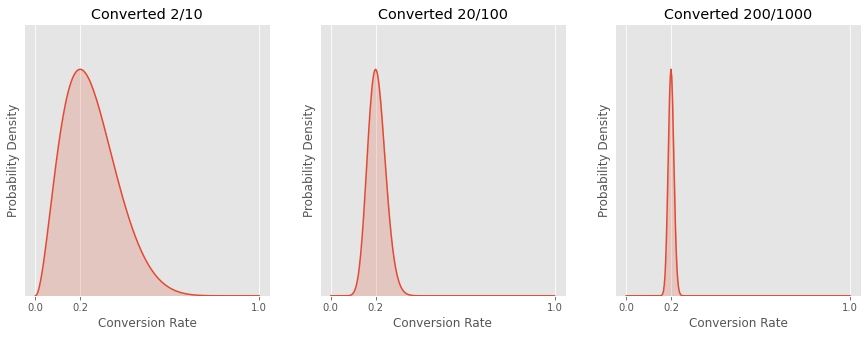

In [19]:
def get_beta_dist_params(website_samples):
    #array of website conversions... zeros and ones (convert or didnt convert)
    website_samples = np.array(website_samples)
    
    #total number of conversions
    num_conversions = website_samples.sum()
    #total number of datapoints
    total_visitors = len(website_samples)
    
    #plus one to set a and beta as uniform priors...try other numbers to see the changes
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    
    #mean number of conversions... aka conversion rate
    mean = 1 * num_conversions / total_visitors
    
    # Alpha = number of successes +1
    # Beta = Number of failures +1
    # Mean = conversion rate
    # num_conversions & total_visitors(used to make labels on graphs)
    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_website(website_samples, ax, label=None):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Conversion Rate")
    ax.set_ylabel("Probability Density")

fig, (left, mid, right) = plt.subplots(1, 3, figsize=(15, 5))

plot_beta_website([0, 1, 0, 0, 0]*2, left)
plot_beta_website([0, 1, 0, 0, 0]*20, mid)
plot_beta_website([0, 1, 0, 0, 0]*200, right)

## Looking at these three graphs we can say:
* ### $\frac{2}{10}$ conversion suggests the conversion rate is about $p=0.2$, but values of $p$ in the range of $0.05$ to $0.45$ would not be unreasonable
* ### $\frac{20}{100}$ also suggests $p=0.2$ and less probability of values of $p$ far from $0.2$
* ### $\frac{200}{1000}$ indicates $p=0.2$ or some number quite close to $0.2$. No value far from $0.2$ is reasonable.


### It is clear that we can use this distribution to model both (1) our belief of the conversion rate based on the data we have (i.e. via the mean), and (2) the strength of our belief (i.e. via the variance).

**A good Bayesian never claims to know anything exactly. Instead they have some beliefs, and they have various levels of strengths regarding their beliefs.**

## Bayesian A/B testing

We're finally ready to do the Bayesian A/B testing.

Say we have two versions of our website: version A and version B (version C we'll use later).

Let's read in the log of our historical visitors for both version A and version B.

A .npz file contains saved numpy arrays using [.savez](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez.html#numpy.savez).

In [29]:
x = np.load("samples.npz")
list(x.values())

[array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0])]

In [27]:
list(x.keys())

['site_B_samples', 'site_C_samples', 'site_A_samples']

In [36]:
len(x['site_A_samples'])

10000

In [37]:
# take a peek at the data
x['site_A_samples'][:20]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [38]:
# how many total?
print("Shape A: ", x['site_A_samples'].shape)
print("Shape B: ", x['site_B_samples'].shape)

Shape A:  (10000,)
Shape B:  (10000,)


In [39]:
# load in a subset
n = 200
site_A_samples = x['site_A_samples'][:n]
site_B_samples = x['site_B_samples'][:n]

np.mean(site_A_samples), np.mean(site_B_samples)

#can we stop there and be content that site_B_samples have a higher average?

(0.215, 0.245)

Now let's plot our belief about each site's conversion rate.

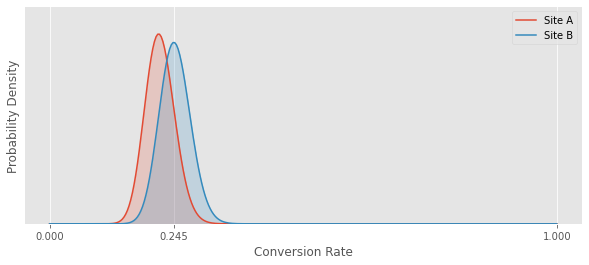

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_beta_website(site_A_samples, ax, label="Site A")
plot_beta_website(site_B_samples, ax, label="Site B")
ax.legend();

## Let's look at how the distributions evolve as data rolls in

In [41]:
2**12

4096

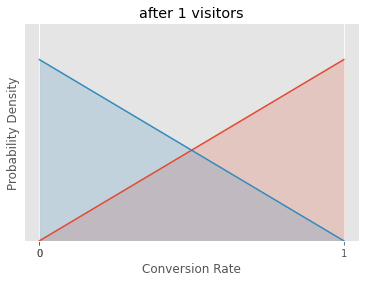

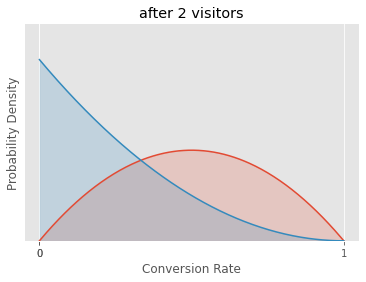

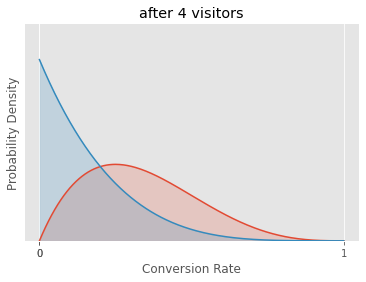

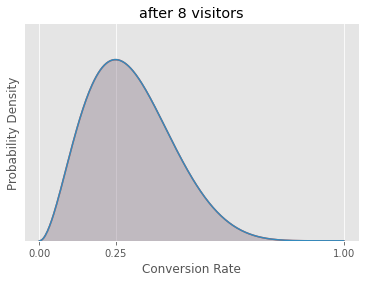

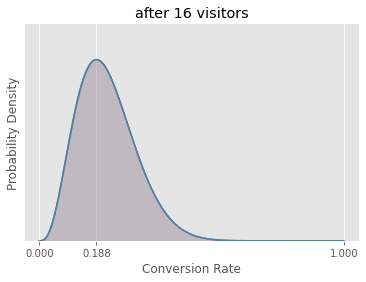

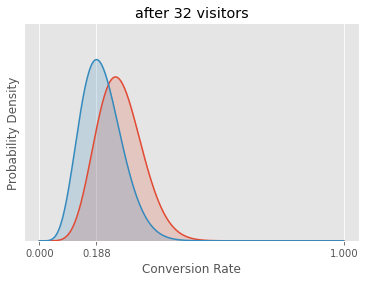

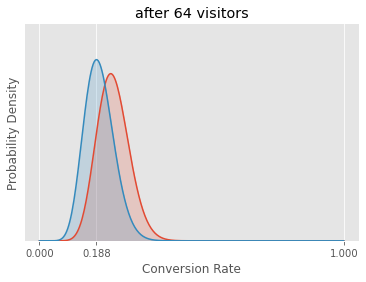

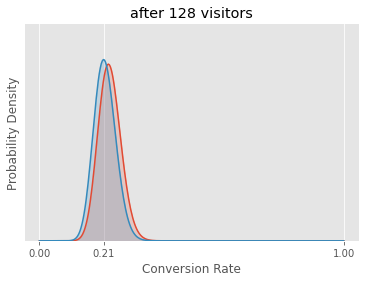

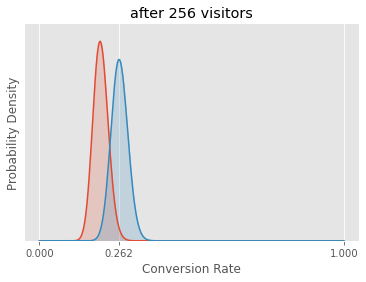

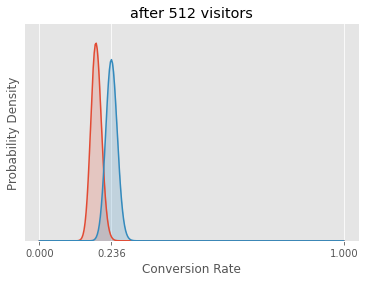

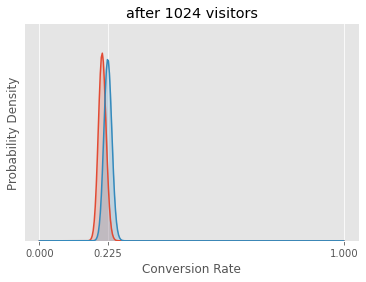

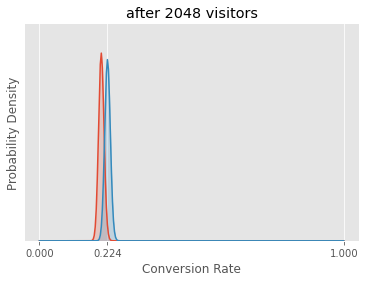

In [42]:
for n in [2**n for n in range(12)]:
    ax = plt.subplot()
    site_A_samples = x['site_A_samples'][:n]
    site_B_samples = x['site_B_samples'][:n]
    plot_beta_website(site_A_samples, ax, label="Site A")
    plot_beta_website(site_B_samples, ax, label="Site B")
    plt.title(f'after {n} visitors')
    plt.show()

### Important question: What's the probability that site B is better than site  A?
Let's figure out how much of site B's Beta distribution is to the right of site A's.

To do this, all we have to do is to take the integral of this function:

$f(x) = \dfrac{x^{\alpha - 1} (1-x)^{\beta - 1}*{\Gamma(\alpha)\Gamma(\beta)}}{{\Gamma(\alpha + \beta)}}$

Where $\Gamma$ is, of course the well-known gamma function.

As it turns out, this calculation is somewhat difficult, but we can take a shortcut using *Monte Carlo* simulation. This shortcut is widely used among data scientists and data engineers. 

We simply **draw a large number of random samples from each distribution, and count how many times B's samples are greater than A's.

The code is short and easy:

In [44]:
a = np.array([1,2,3,4])
b = np.array([0,3,2,5])
(b > a).mean()

0.5

In [45]:
num_simulations = 100_000

#Let's just grab our Alpha and betas from site_A
alpha, beta = get_beta_dist_params(site_A_samples)[:2]
print(f'Site_A alpha and beta {alpha, beta}')
#Set up first distribution
dist_A = stats.beta(alpha, beta)

#Same steps for beta dist
alpha, beta = get_beta_dist_params(site_B_samples)[:2]
print(f'Site_B alpha and beta {alpha, beta}')
dist_B = stats.beta(alpha, beta)

#randomly sample 100_000 data points from each distribution
simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)


print(f'On average, how many times is Bs Conversion Rate greater than As: {(simulated_B > simulated_A).mean()}')

Site_A alpha and beta (417, 1633)
Site_B alpha and beta (459, 1591)
On average, how many times is Bs Conversion Rate greater than As: 0.94534


Another way to look at this data is by plotting random samples from B against random samples of A. This creates a 'blob plot'. By measuring how much of the blob is above the *y=x* line, we can determine the probability that B is better than A.

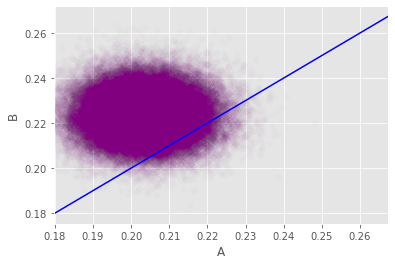

In [50]:
#scatter plot our different conversion rates sampled from our distributions
plt.scatter(simulated_A, simulated_B, alpha = .01, color='purple');
plt.xlim(plt.ylim())
plt.xlabel('A'), plt.ylabel('B')
plt.plot(plt.xlim(), plt.xlim(), color = 'blue');

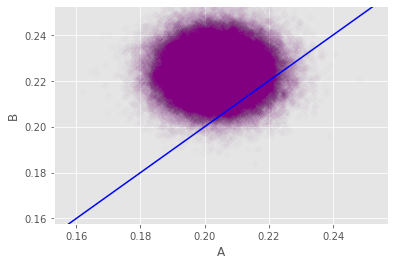

In [52]:
#scatter plot our different conversion rates sampled from our distributions
plt.scatter(simulated_A, simulated_B, alpha = .01, color='purple');
plt.ylim(plt.xlim())
plt.xlabel('A'), plt.ylabel('B')
plt.plot(plt.ylim(), plt.ylim(), color = 'blue');

Translation: In our simulation, 94% of the time, site B is better than site A. We can then interpret this as a probability, meaning we can say:

> "It is 94% likely that site B is better than site A."

**CAN FREQUENTIST DO THAT?** No, they can NOT!

They can only say horribly unintelligible things like "the p-value of 0.11 does not support the decision to reject the null hypothesis at an $\alpha$ level of 0.05."

Who needs that crap?

### In our model, conversion is a bernoulli process: it either happens or it doesn't and the probability that it is going to happen is a fixed value, *p* that does not change over time.

### The beta distribution gives us an estimate of *p*, but as a distribution over a range of values, not a fixed value.

### Suppose we want to put some bounds on the range where the **true** value of *p* may be found. 

### We call this the "credible interval" and it's largely analogous to the "confidence interval" of conventional stats.

### What's the 95% credible interval of site B's conversion rate?

To calculate it, we measure the area under the curve that contains 95% of the data, or rather the interval under the curve that does not contain the first or last 2.5% of the data. 

Note that the distribution may be skewed, so these aren't necessarily symmetrical around the distribution mean.

In [63]:
x = np.linspace(*dist_B.ppf([.001, .999]),2)
x
dist_B.ppf([.001, .999])

array([0.19624595, 0.25309269])

In [66]:
x = np.linspace(*dist_B.ppf([.001, .999]),101)
dist_B.pdf(x).max()

43.33868694617249

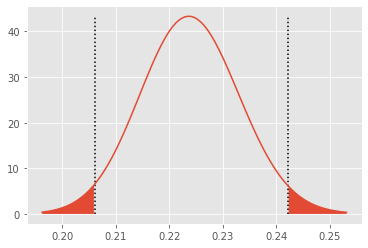

In [62]:
x = np.linspace(*dist_B.ppf([.001, .999]),101)
plt.plot(x, dist_B.pdf(x))
plt.vlines(dist_B.ppf([.025, .975]), ymin = 0, ymax = dist_B.pdf(x).max(), linestyles='dotted')
plt.fill_between(x, 0, dist_B.pdf(x), where = (x< dist_B.ppf(.025)) | (x > dist_B.ppf(.975) ));

In [67]:
interval_size = 0.95
tail_area = (1 - interval_size) / 2

print("{0:0.1f}% credible interval conversion rate lower bound: {1:0.3f}, upper bound {2:0.3f}".format(
       interval_size *100,
       dist_B.ppf(tail_area), 
       dist_B.ppf(1 - tail_area)))

# or if you are lazier
# dist_B.ppf([0.025, .975])

95.0% credible interval conversion rate lower bound: 0.206, upper bound 0.242


### What if the difference between sites A and B is larger?

Let's explore this.

In [68]:
x = np.load("samples.npz")

n = 1000

site_A_samples = x['site_A_samples'][:n]
site_C_samples = x['site_C_samples'][:n]

np.mean(site_A_samples), np.mean(site_C_samples)

(0.202, 0.315)

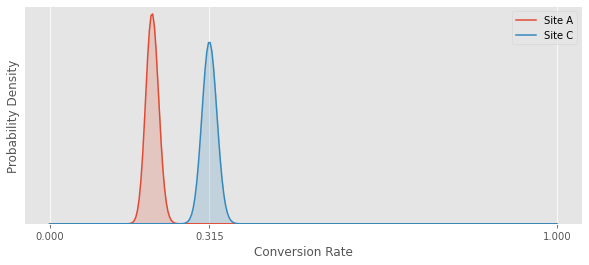

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_beta_website(site_A_samples, ax, label="Site A")
plot_beta_website(site_C_samples, ax, label="Site C")
ax.legend();

In [70]:
num_simulations = 10000000

alpha, beta = get_beta_dist_params(site_A_samples)[:2]
dist_A = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(site_C_samples)[:2]
dist_C = stats.beta(alpha, beta)

simulated_A = dist_A.rvs(num_simulations)
simulated_C = dist_C.rvs(num_simulations)
C_vs_A = simulated_C > simulated_A
print((simulated_C > simulated_A).mean())

1.0


In [71]:
C_vs_A.sum()

10000000

In our simulation, 100% of the time site C is better than site A. We can then interpret this as a probability, meaning we can say:

> "It is 100% likely that site C is better than site A."

We used 1,000 samples of each site just now. We _probably_ didn't need this much data in this case; we probably spent longer running this test than needed. Re-run the three cells above using less data. (You really only need about 300 samples of each site with this amount of difference between the sites.)

### Benefits of Bayesian A/B Testing

In general, Bayesian A/B testing is better for these reason:

1. You can say stuff like "It is \_\_% likely that site \_\_ is better than site \_\_."
2. You can stop the test early based on surprising data.
3. You can update the test while it is running.

## Why do we call this Bayesian A/B Testing?

I haven't yet proved to you that what we did above is actually _correct_. All we've done is show that the Beta Distribution _seems_ to do what we want if we set $\alpha$ and $\beta$ to the number of conversions and failures, respectively. Let's work on showing _why_ this works.

We can derive it by beginning with Bayes' Theorem. First, let's just recall the theorem:

![](images/bayes_formula.png)

$\Theta$ represents the random variable that is our unknown conversion rate, and $y$ is the number of conversions we've observed on the website to-date.

Next, we note that the denominator on the right ($P(y)$) is just a normalizing term, so we'll simplify it to:

$$P(\Theta \, | \, y) \propto P(y \, | \, \Theta) P(\Theta)$$

In the past we've only put scalar values into each part of the equation above, but... what if we plugged PDF equations into each part? Let's try it.

Our prior ($P(\Theta)$) will be a uniform distribution initially, meaning we don't have any initial belief about what values $\Theta$ should be -- we see all values as equally likely (we don't _have_ to do it this way, but this will work fine).  We use the $\beta$ here, however, because it can give a uniform distribution initially but evolve as data comes in.

Our likelihood distribution ($P(y \, | \, \Theta)$) is a Binomial distribution. It will tell us the likelihood of our data under various values of $\Theta$. 

Finally, the posterior distribution ($P(\Theta \, | \, y)$) tells us what we actually want to know: the relative probability of each value of $\Theta$ (i.e. the relative probability of each possible conversion rate).

$$
\begin{align*}
P(\Theta \, | \, y) &\propto P(y \, | \, \Theta) * P(\Theta) \\
P(\Theta \, | \, y) &\propto \text{Binomial}(n, \Theta) * \text{Beta}(\alpha, \beta) \\
P(\Theta \, | \, y) &\propto {n \choose y} \Theta^y (1-\Theta)^{n-y} * \dfrac{\Theta^{\alpha - 1} (1-\Theta)^{\beta - 1}}{B(\alpha, \beta)} \\
P(\Theta \, | \, y) &\propto \Theta^y (1-\Theta)^{n-y} * \Theta^{\alpha - 1} (1-\Theta)^{\beta - 1} \\
P(\Theta \, | \, y) &\propto \Theta^{\alpha + y - 1} (1-\Theta)^{\beta + n - y - 1} \\
P(\Theta \, | \, y) &= \text{Beta}(\alpha' = \alpha + y, \, \, \beta' = \beta + n - y) \\
\end{align*}
$$

All that's to say, if you multiply a Beta distribution by a Binomial distribution, out pops a *new* Beta distribution:

$$\text{Beta} \propto \text{Binomial} * \text{Beta}$$

This relationship, where your prior and posterior are of the same distribution family, is called a "conjugate prior".  The Beta distribution is a "conjugate prior" of the binomial distribution. There are many more [conjugate prior relationships.](https://en.wikipedia.org/wiki/Conjugate_prior)

![](images/conj_prior.png)

The derivation above shows that our process for modeling conversion rates on websites is sound. What's really going on is that we've found a short-cut way of applying Bayes' theorem to update our prior beliefs. We usually make our first prior just a uniform distribution by using a Beta distribution with $\alpha=1$ and $\beta=1$.

To recap, we model the conversion rate as a Beta distribution where:
- $\alpha = 1 + \text{number of conversions on our website}$
- $\beta = 1 + \text{number of misses on our website}$

This final plot shows how we can update our belief with more-and-more data to get stronger-and-stronger beliefs of the underlying conversion rate of our website.

In [72]:
x = np.load("samples.npz")

site_A_samples = x['site_A_samples']

len(site_A_samples), np.mean(site_A_samples)

(10000, 0.2055)

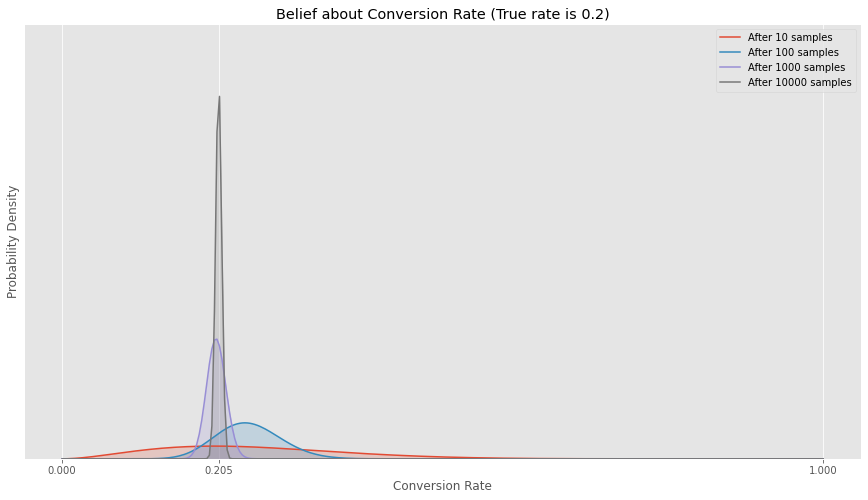

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

num_samples = [10, 100, 1000, 10000]  # , 10000

for k in num_samples:
    samples = site_A_samples[:k]
    plot_beta_website(samples, ax, label="After {} samples".format(k))

ax.set_title("Belief about Conversion Rate (True rate is 0.2)")
ax.legend();

## Final Words

Frequentist methods were created before modern computers. Those methods lean on limits and integrals which can be done by hand. It's from those limits and integrals that they have to take the "long run" point of view.

Bayesians still build on top of the laws of probability and the well-known distributions, but Bayesians take a different approach to how they interpret probability, which fits better with our needs (usually). Bayesians love to build layers of distributions one atop the other, using Bayes' theorem to string them all together. Once built, they  visualize the final distribution by repeated sampling, requiring a lot of computation (thank you, computers).

All scientists love data. We love data because it helps us understand the world. That's why we like the Bayesian mindset. We believe things, we collect data, and we refine our beliefs. Then we repeat that. I leave you with this final _xkcd_.

<img src="https://imgs.xkcd.com/comics/the_difference.png" width=500px>